<a href="https://colab.research.google.com/github/ayanxx/inse6220project/blob/main/Ayush_Narnaware_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install pycaret library**

In [ ]:
!pip install pycaret==2.3.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 35.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Install PCA library**

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.0 MB/s eta 0:00:00


**Install SHAP library**

In [ ]:
#SHAP uses shapely values to explain output of machine learning model
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.3 MB/s eta 0:00:00


# **Importing python modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

ModuleNotFoundError: ignored

# **Importing Data**

**About the Vertebral Column Dataset**

The central axis of the human body comprises a lengthy, pliable column of bones known as the vertebral column, commonly called the spinal column or spine. Extending from the skull to the pelvis, it serves as the primary structural support for the body and safeguards the spinal cord.

In this specific dataset, there are values for six biomechanical features derived from the shape and orientation of the pelvis and lumbar spine. These features are utilized to categorize orthopaedic patients into two groups: normal or abnormal (patients with Disk Hernia or Spondylolisthesis).

The dataset comprises 310 entries, with 100 patients classified as normal and 210 as abnormal. The attributes include:

1. Pelvic Incidence
2. Pelvic Tilt
3. Lumbar Lordosis Angle
4. Sacral Slope
5. Pelvic Radius
6. Degree of Spondylolisthesis
7. Class: Binary (Normal / Abnormal)
All attributes consist of real and continuous values.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/navkamboj/Navjot_INSE_6220_Project/main/column_2C.csv')
df = df.drop(columns=["pelvic_radius"])
df.head(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   degree_spondylolisthesis     class  
0                 -0.254400  Abnormal  
1                  4.564259  Abnormal  
2                 -3.530317  Abnormal  
3                 11.211523  Abnormal  
4                  7.918501  Abnormal

In [ ]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   degree_spondylolisthesis  310 non-null    float64
 5   class                     310 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.7+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


**Converting String values to Binary 1 and 0 for Class Attribute**

In [ ]:
# class = 1 -> "abnormal", class = 0 -> normal
dummy = pd.get_dummies(df['class'])
dummy.head()

Abnormal  Normal
0         1       0
1         1       0
2         1       0
3         1       0
4         1       0

In [ ]:
df = pd.concat((df, dummy), axis=1)

In [ ]:
df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   degree_spondylolisthesis     class  Abnormal  Normal  
0                 -0.254400  Abnormal         1       0  
1                  4.564259  Abnormal         1       0  
2                 -3.530317  Abnormal         1       0  
3                 11.211523  Abnormal         1       0  
4                  7.918501  Abnormal         1       0

In [ ]:
df = df.drop(['class','Normal'],axis =1)
df = df.rename(columns={'Abnormal':'class'})
df.head()
df2=df

# Classes

In [ ]:
y = df['class']
target = df['class'].to_numpy()

# Features

**Data Matrix**

In [ ]:
X = df.iloc[:,0:5]
X.head(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   degree_spondylolisthesis  
0                 -0.254400  
1                  4.564259  
2                 -3.530317  
3                 11.211523  
4                  7.918501

In [ ]:
X.describe().transpose()

count       mean        std        min        25%  \
pelvic_incidence          310.0  60.496653  17.236520  26.147921  46.430294   
pelvic_tilt               310.0  17.542822  10.008330  -6.554948  10.667069   
lumbar_lordosis_angle     310.0  51.930930  18.554064  14.000000  37.000000   
sacral_slope              310.0  42.953831  13.423102  13.366931  33.347122   
degree_spondylolisthesis  310.0  26.296694  37.559027 -11.058179   1.603727   

                                50%        75%         max  
pelvic_incidence          58.691038  72.877696  129.834041  
pelvic_tilt               16.357689  22.120395   49.431864  
lumbar_lordosis_angle     49.562398  63.000000  125.742385  
sacral_slope              42.404912  52.695889  121.429566  
degree_spondylolisthesis  11.767933  41.287352  418.543082

**Standardize Data**

In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.head(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.147086     0.501369              -0.665177     -0.184950   
1         -1.245864    -0.748769              -1.453001     -1.041521   
2          0.484370     0.467932              -0.099262      0.273083   
3          0.511390     0.711562              -0.411339      0.126128   
4         -0.626648    -0.789693              -1.274745     -0.215876   

   degree_spondylolisthesis  
0                 -0.708059  
1                 -0.579556  
2                 -0.795421  
3                 -0.402288  
4                 -0.490106

In [ ]:
df.describe().transpose()

count          mean       std       min       25%  \
pelvic_incidence          310.0  1.031433e-16  1.001617 -1.996010 -0.817398   
pelvic_tilt               310.0 -4.584147e-17  1.001617 -2.411664 -0.688114   
lumbar_lordosis_angle     310.0 -2.979695e-16  1.001617 -2.047652 -0.806027   
sacral_slope              310.0 -6.876220e-17  1.001617 -2.207741 -0.716842   
degree_spondylolisthesis  310.0 -6.876220e-17  1.001617 -0.996173 -0.658507   

                               50%       75%        max  
pelvic_incidence         -0.104925  0.719464   4.029206  
pelvic_tilt              -0.118606  0.458116   3.191402  
lumbar_lordosis_angle    -0.127862  0.597549   3.984615  
sacral_slope             -0.040960  0.726941   5.855771  
degree_spondylolisthesis -0.387450  0.399768  10.460350

**Observations and Variables**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Data Visualization

**Class Distribution**

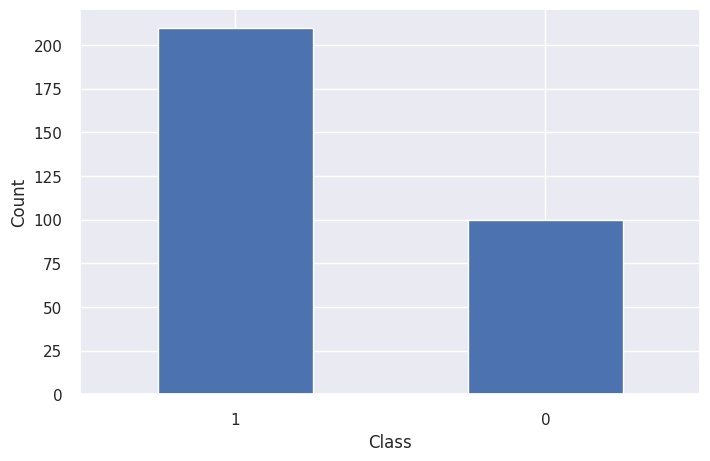

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Pie Plot**

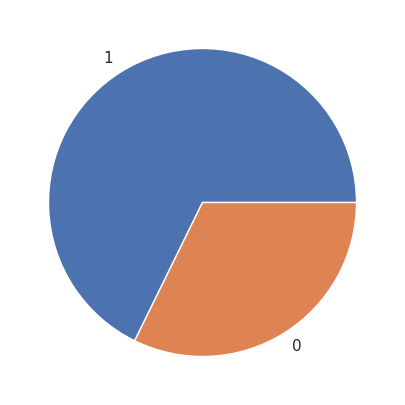

In [ ]:
y.value_counts().plot(kind='pie', rot=0)
plt.ylabel('')
plt.show()

**Box & Whisker plot**

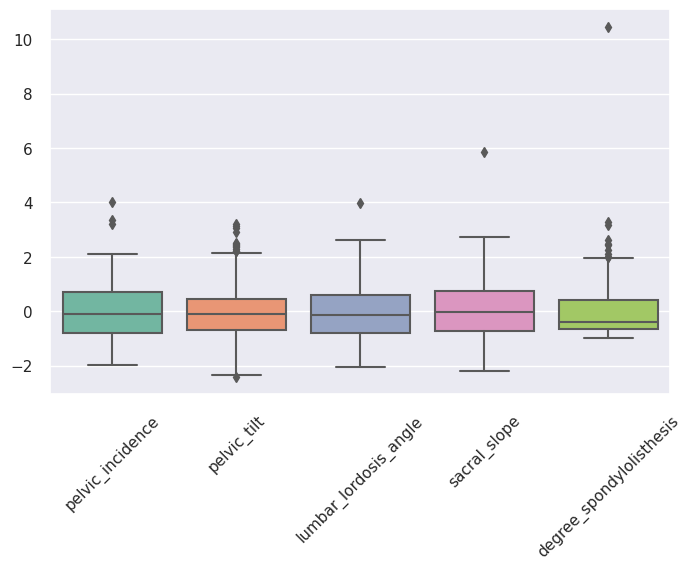

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

[Text(0, 0, 'pelvic_incidence'),
 Text(1, 0, 'pelvic_tilt'),
 Text(2, 0, 'lumbar_lordosis_angle'),
 Text(3, 0, 'sacral_slope'),
 Text(4, 0, 'degree_spondylolisthesis')]

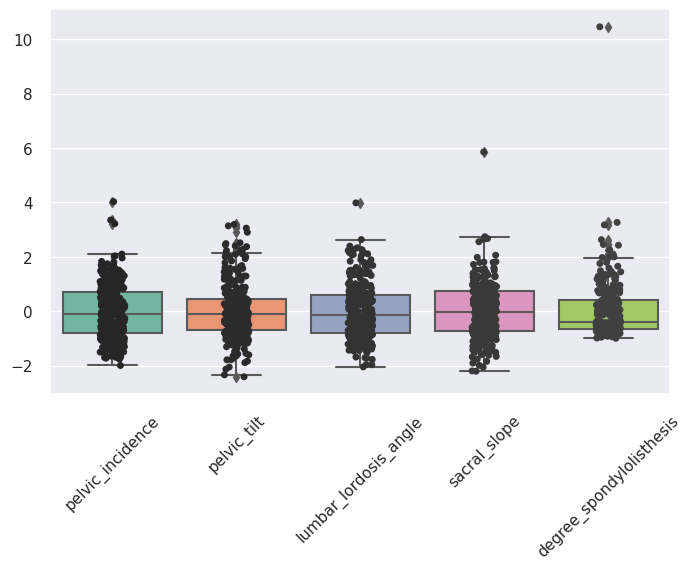

In [ ]:
# Use swarmplot / stripplot to show the datapoints on top of the boxes
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

**Five Number Summary**

In [ ]:
df.describe()

pelvic_incidence   pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count      3.100000e+02  3.100000e+02           3.100000e+02  3.100000e+02   
mean       1.031433e-16 -4.584147e-17          -2.979695e-16 -6.876220e-17   
std        1.001617e+00  1.001617e+00           1.001617e+00  1.001617e+00   
min       -1.996010e+00 -2.411664e+00          -2.047652e+00 -2.207741e+00   
25%       -8.173983e-01 -6.881138e-01          -8.060267e-01 -7.168419e-01   
50%       -1.049245e-01 -1.186062e-01          -1.278621e-01 -4.095972e-02   
75%        7.194643e-01  4.581158e-01           5.975493e-01  7.269414e-01   
max        4.029206e+00  3.191402e+00           3.984615e+00  5.855771e+00   

       degree_spondylolisthesis  
count              3.100000e+02  
mean              -6.876220e-17  
std                1.001617e+00  
min               -9.961725e-01  
25%               -6.585073e-01  
50%               -3.874502e-01  
75%                3.997679e-01  
max                1.046035e+01

**Pair Plot**

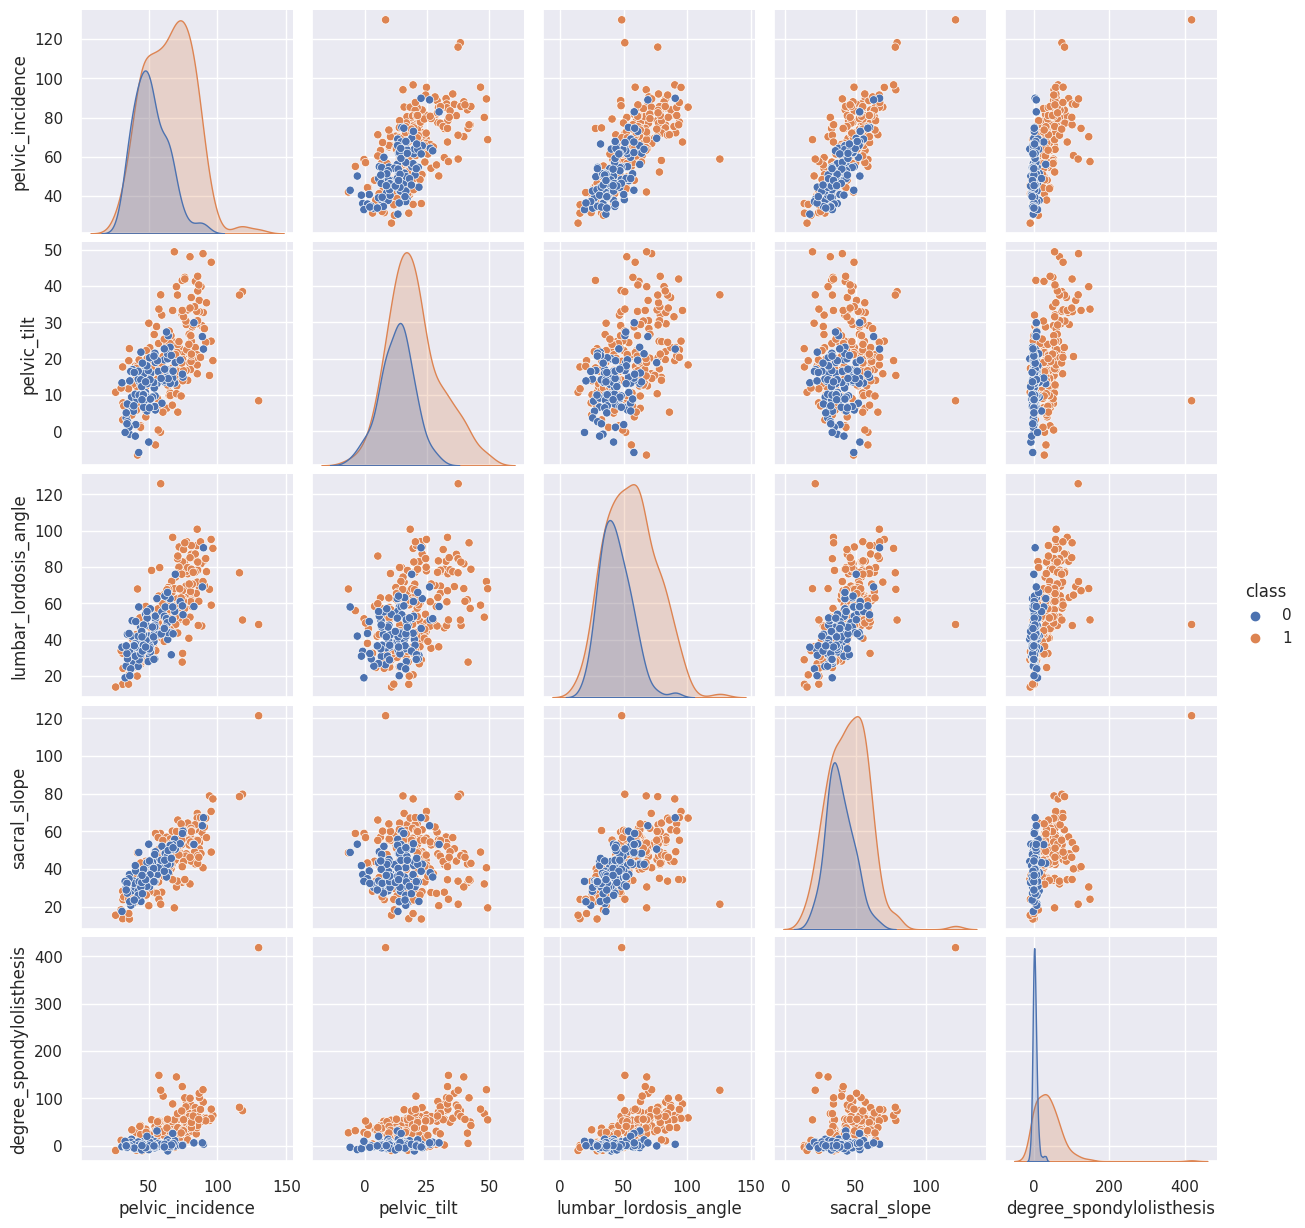

In [ ]:
sns.pairplot(df2, hue='class')

**Correlation Matrix**

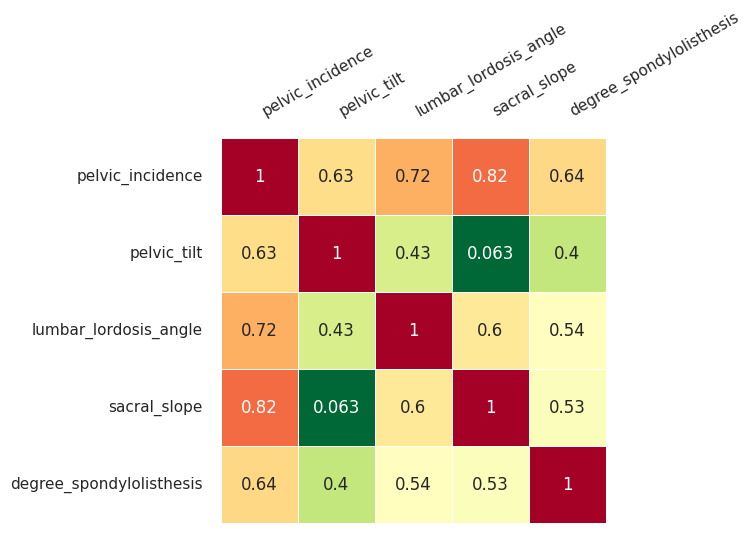

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='left');


In [ ]:
cova = np.cov(X.transpose())
covaMatrix = pd.DataFrame(cova)
covaMatrix.head(15)

0           1           2           3            4
0  297.097632  108.542318  229.392280  188.555315   413.513704
1  108.542318  100.166674   80.362172    8.375644   149.557681
2  229.392280   80.362172  344.253289  149.030108   371.897908
3  188.555315    8.375644  149.030108  180.179672   263.956023
4  413.513704  149.557681  371.897908  263.956023  1410.680475

# Principal Component Analysis(PCA)

Text(0, 0.5, '$Z_2$')

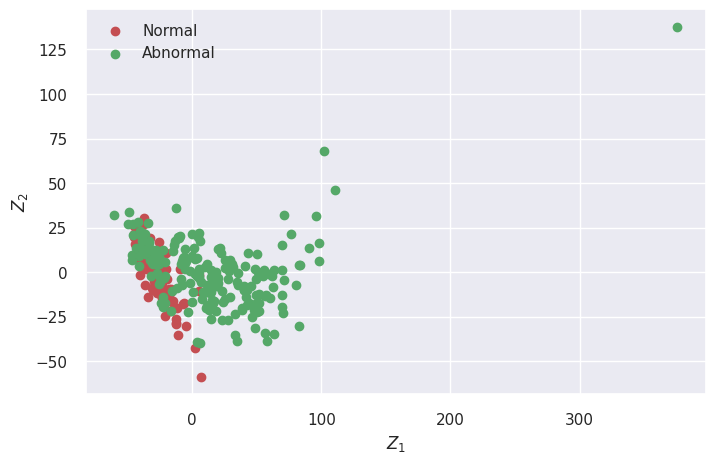

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# Normal->0,  Abnormal->1
idx_Normal = np.where(y == 0)
idx_Abnormal = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='r', label='Normal')
plt.scatter(Z[idx_Abnormal,0], Z[idx_Abnormal,1], c='g', label='Abnormal')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

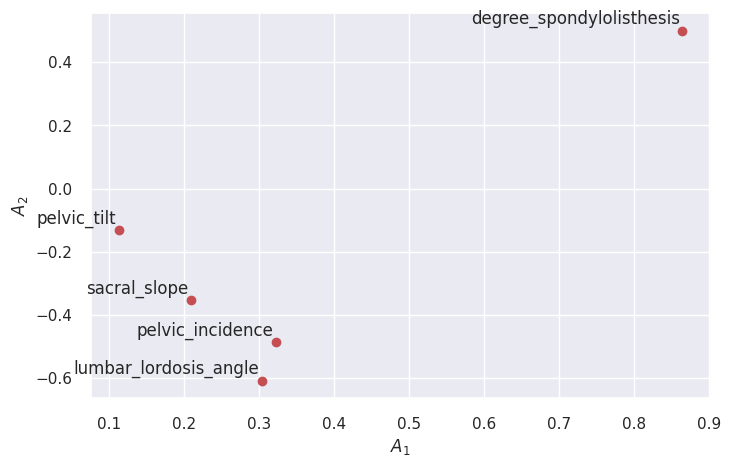

In [ ]:
A = pca.components_.T

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

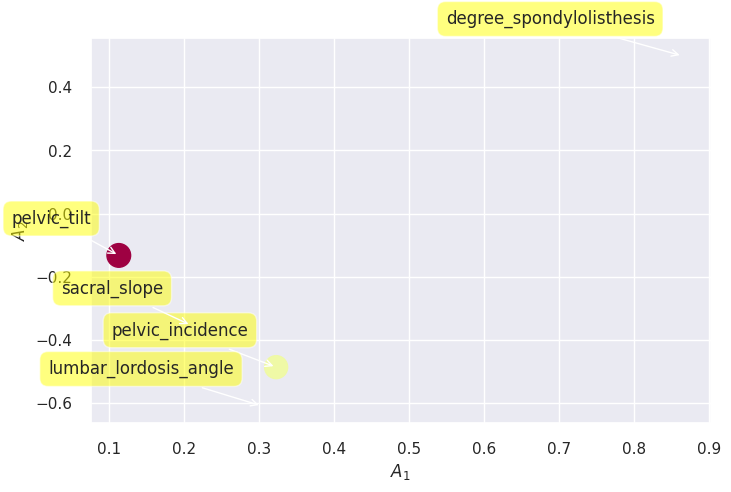

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

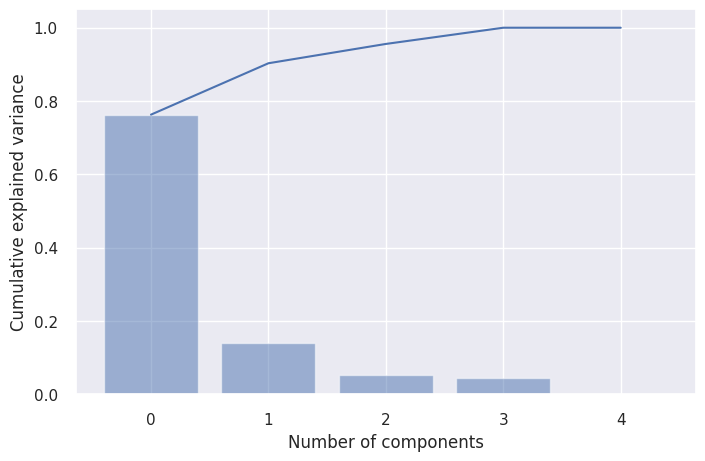

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance


{'0': 'PC 1 (76.3%)',
 '1': 'PC 2 (14.0%)',
 '2': 'PC 3 (5.3%)',
 '3': 'PC 4 (4.4%)',
 '4': 'PC 5 (0.0%)'}

**Biplot**

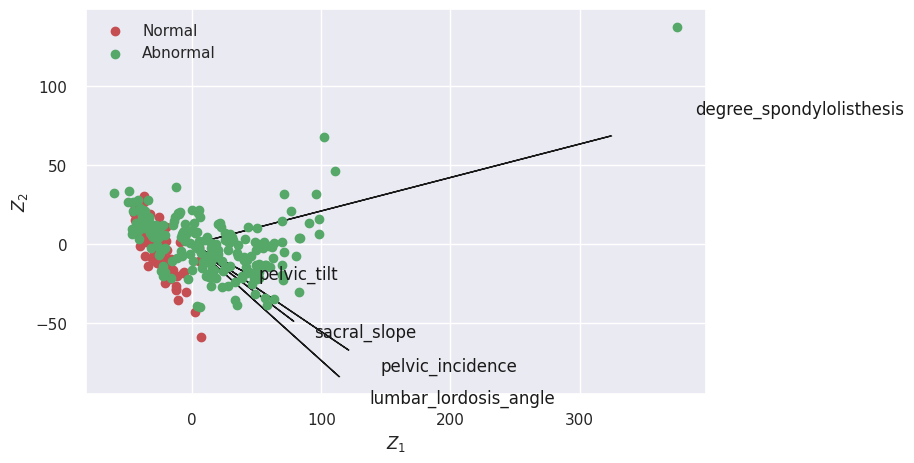

In [ ]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='r', label='Normal')
plt.scatter(Z[idx_Abnormal,0], Z[idx_Abnormal,1], c='g', label='Abnormal')

plt.legend(loc='upper left')




# **Using PCA Library**

In [ ]:
from pca import pca
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
# Top features in signifacnt PCs
out['topfeat']

PC                   feature   loading  type
0  PC1  degree_spondylolisthesis  0.864124  best
1  PC2     lumbar_lordosis_angle -0.609239  best
2  PC3              sacral_slope  0.704629  best
3  PC2          pelvic_incidence -0.486608  weak
4  PC3               pelvic_tilt -0.547274  weak

In [ ]:
out['PC']

PC1         PC2        PC3
0    -25.818536   -6.766650   1.368696
1    -37.650172   21.914533   2.477141
2    -22.343170  -19.740918   2.383110
3    -11.346149   -8.712364   2.048000
4    -28.034915   12.530611  10.745954
5    -39.369270   20.533807  -1.352777
6    -25.632256    4.423524   2.447958
7    -46.304532    6.706130   5.483435
8    -22.557373   12.291085  -5.351613
9    -36.655415   10.526911  -0.375421
10   -41.053274    3.587683   5.365296
11   -48.954754   33.952065  -9.785935
12   -25.728616    8.258302  -7.908913
13   -26.321962    8.327427  -1.475135
14   -21.578869   -3.087801  -8.800299
15   -30.985001   11.712384  -0.786996
16   -20.958919  -17.217224  -1.515229
17   -39.650455   21.856589   1.242715
18   -39.058783   17.753569  -4.572767
19   -39.906263   14.141760  -0.072702
20   -29.932138   11.868747  -3.924805
21   -26.884829   -0.518383  -4.876176
22    -7.748185   -7.156912  -7.159856
23   -41.136043    9.143754   2.151138
24   -45.964290   20.864212 -17.560936
25   -30.675713    5.140896  -9.641111
26   -60.602496   32.313056  -4.728007
27   -25.358974    8.354949 -11.041045
28   -36.980421   17.888874  -8.379209
29   -22.570005  -16.251685  -2.316779
30   -21.133555    5.687289  -1.541096
31   -30.105559   12.547432   4.493060
32   -33.520564   17.422644  -2.876831
33   -35.199750   12.834072  -7.849848
34   -24.950442   -5.164858 -16.372865
35   -41.837884   28.144737  -0.941943
36   -36.131898   21.321979  -4.347530
37   -45.820453   27.027163 -10.288449
38   -25.146194   -2.728571 -16.153425
39   -30.577791    4.615879  -1.778982
40   -49.502239   27.009565   1.413347
41   -34.512357   11.631354   9.249440
42   -27.632524    7.157254   0.460116
43   -22.522003  -13.749294  -3.884436
44   -23.851335  -17.111565  -6.407461
45   -32.034580   -2.118631 -12.761083
46   -28.833027   10.963206  -9.502896
47   -43.157335   13.435423  -6.027599
48   -40.157071   13.884625  -9.887448
49   -40.635239   23.157773  -2.866502
50   -28.146784    4.593802  -0.321016
51   -20.647492   -2.271593  -7.599363
52   -29.221880   10.728959 -17.274878
53   -33.882617   27.781475 -11.390683
54   -46.868403    9.536905  -8.237748
55   -28.360812    9.143458   0.911509
56   -33.161112   16.468338   8.122313
57   -32.570447    7.170559  -2.892815
58   -39.800431   10.734593 -10.127285
59   -27.170688   10.645194  -0.312414
60    39.922836   -9.919954 -17.834233
61    80.356508   -7.371646  -7.632667
62    -5.274649   12.987711  -3.666401
63    13.131385  -20.900072   4.720445
64     3.624985  -39.007081  -4.997952
65    13.506772  -20.436014 -13.787204
66    12.526123  -18.472344   6.278706
67    48.984063    1.810236   5.244426
68   -16.101652  -21.477928   8.850373
69     2.094561   -1.200387  20.820223
70    11.483051   -7.315419  10.513865
71    76.500352   21.380574   4.558581
72    55.767806    1.389744  -2.497659
73     1.826409   13.707115  -4.210655
74    43.937001  -17.204583 -13.637553
75   110.852476   46.336193 -27.452464
76    90.527756   13.702630  -8.620511
77    22.315916   11.022077  10.058272
78    12.115352   -7.414026   2.547237
79   -14.180196   15.086439   1.350575
80    51.352111    0.401764  -9.701562
81    50.205638   10.208329   4.414741
82    34.586113   -5.692725  11.404422
83    51.788193  -12.102606  -2.657398
84    28.232391    0.878057 -19.917933
85   -14.555148   12.199631  -0.426536
86    -1.807984   -5.843244  -4.075630
87    -0.246699   21.449658  -1.274835
88    -6.984596    8.019098   1.800001
89     3.435048   -2.070400   4.737082
90    15.830760  -16.992570   1.503352
91    14.014588  -11.759514   1.054150
92    62.360900   -8.469630  14.741011
93    28.089301   -3.521716 -10.629165
94    46.228614  -24.937420  24.812916
95   102.375313   67.813040 -23.414920
96    63.346470  -34.428686  12.219114
97    22.772295  -26.733763  -3.613271
98    51.578875  -21.475779  -9.412171
99    -0.345140    9.276141   7.221161
100   14.691496  -26.254012  -1.007350
101   24.269708  -16.890981  10.28

In [ ]:
A = out['loadings'].T
print(A)

                               PC1       PC2       PC3
pelvic_incidence          0.322979 -0.486608  0.157356
pelvic_tilt               0.113404 -0.132726 -0.547274
lumbar_lordosis_angle     0.303630 -0.609239 -0.423255
sacral_slope              0.209575 -0.353881  0.704629
degree_spondylolisthesis  0.864124  0.499192 -0.009165


In [ ]:
pcss = PCA()
pcss.fit_transform(X)
A = pcss.components_.T
Lambda = pcss.explained_variance_

In [ ]:
print(f'Eigenvectors:\n{A}')
print(f'Eigenvalues:\n{Lambda}')

Eigenvectors:
[[ 3.22979161e-01 -4.86607799e-01  1.57355569e-01  5.48455287e-01
   5.77350270e-01]
 [ 1.13403713e-01 -1.32726399e-01 -5.47273634e-01  5.80242653e-01
  -5.77350270e-01]
 [ 3.03630173e-01 -6.09238751e-01 -4.23254625e-01 -5.97906669e-01
   1.51497315e-10]
 [ 2.09575448e-01 -3.53881401e-01  7.04629205e-01 -3.17873657e-02
  -5.77350268e-01]
 [ 8.64124360e-01  4.99191998e-01 -9.16513199e-03 -6.33438259e-02
  -3.29931638e-11]]
Eigenvalues:
[1.77955659e+03 3.26822977e+02 1.22829772e+02 1.03168408e+02
 8.37351715e-14]


**Scree Plot**

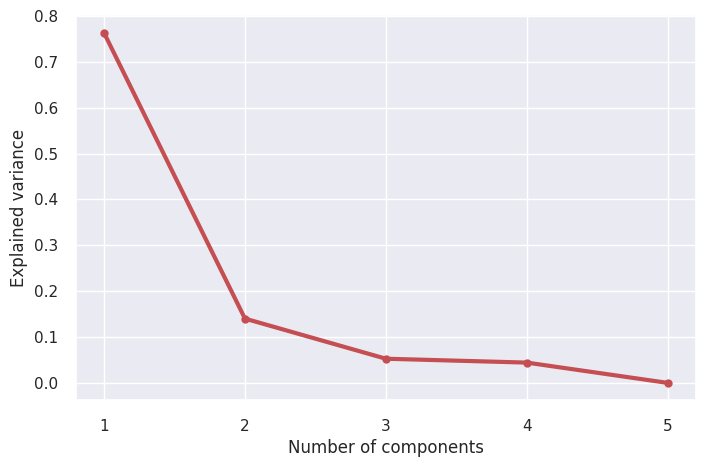

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

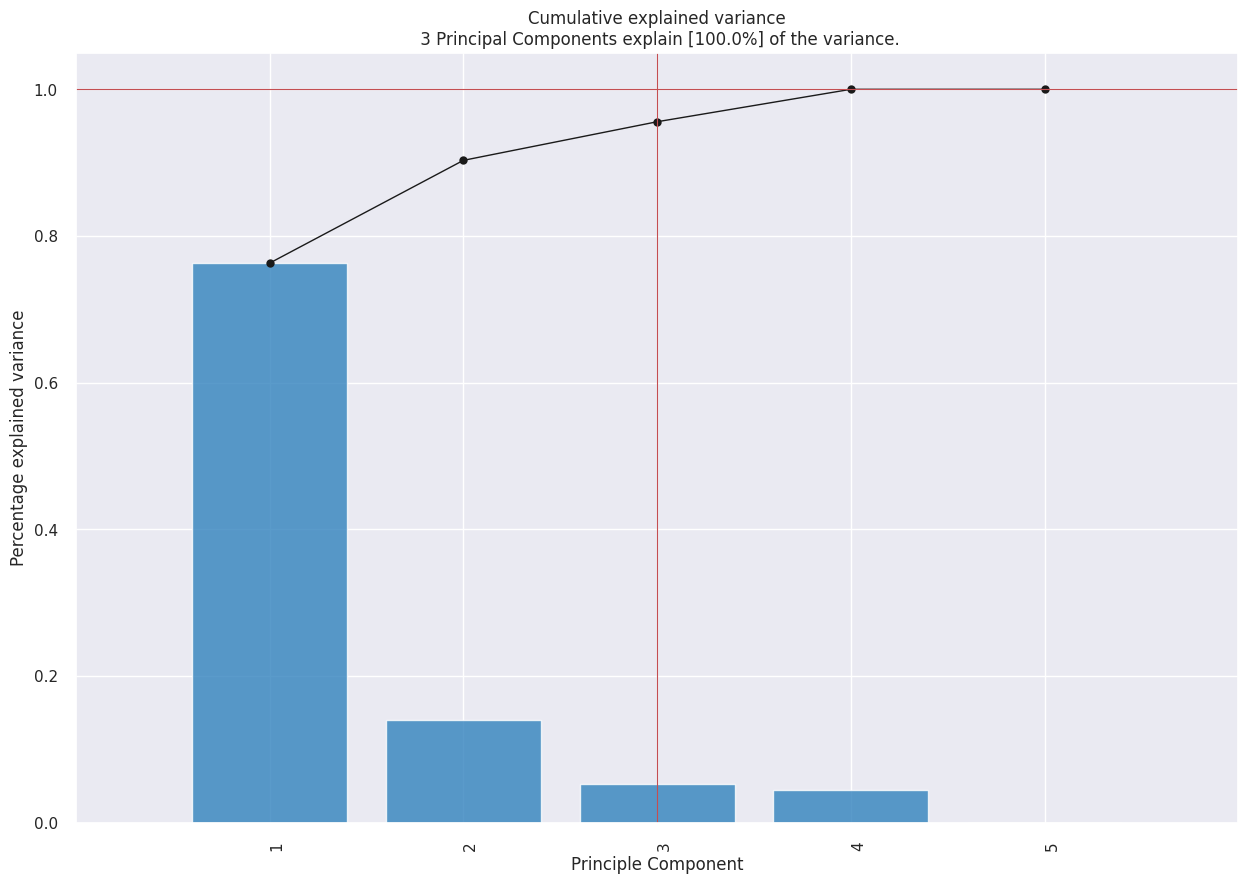

<Figure size 800x500 with 0 Axes>

In [ ]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (76.2% expl.var)', ylabel='PC2 (14.0% expl.var)'>)

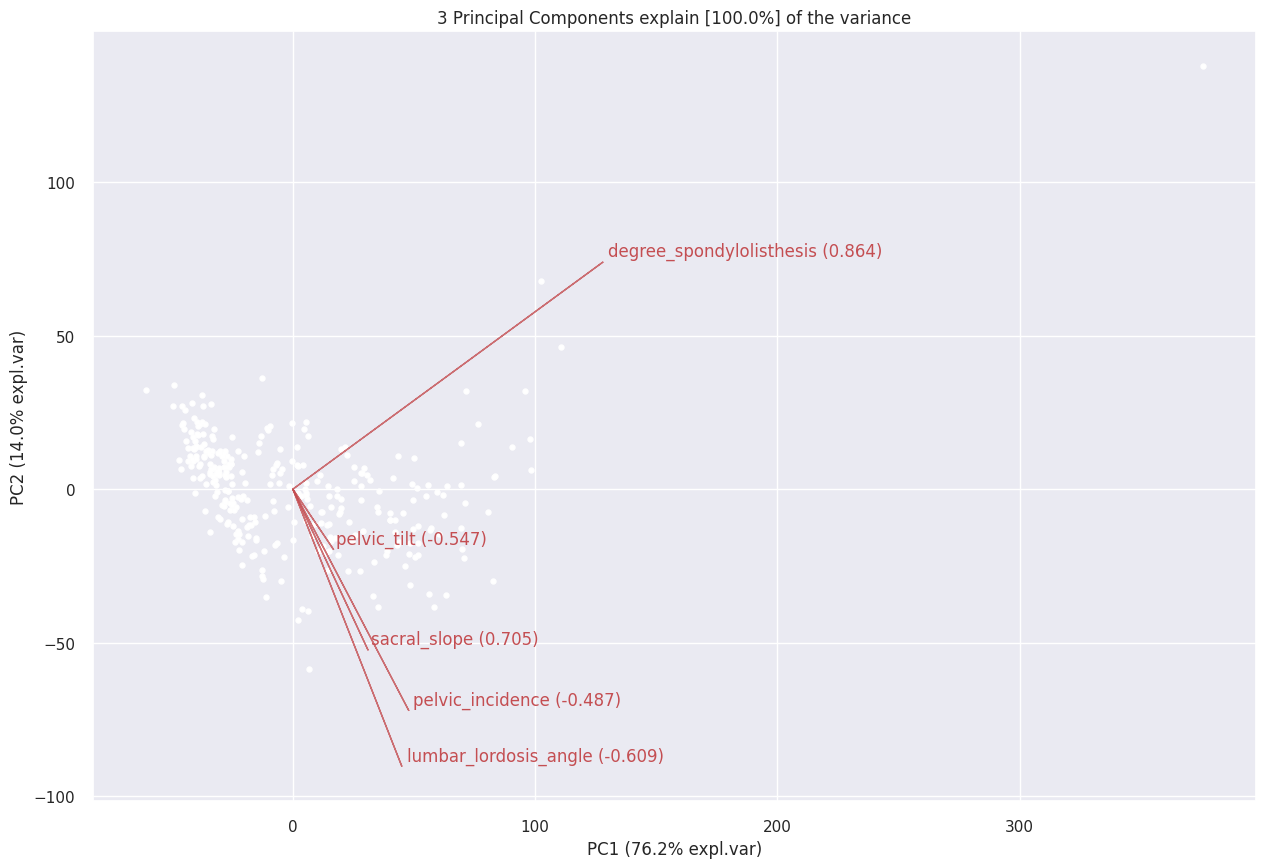

In [ ]:
model.biplot(label=False, legend=False, cmap=None)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [310] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [310] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (76.2% expl.var)', ylabel='PC2 (14.0% expl.var)'>)

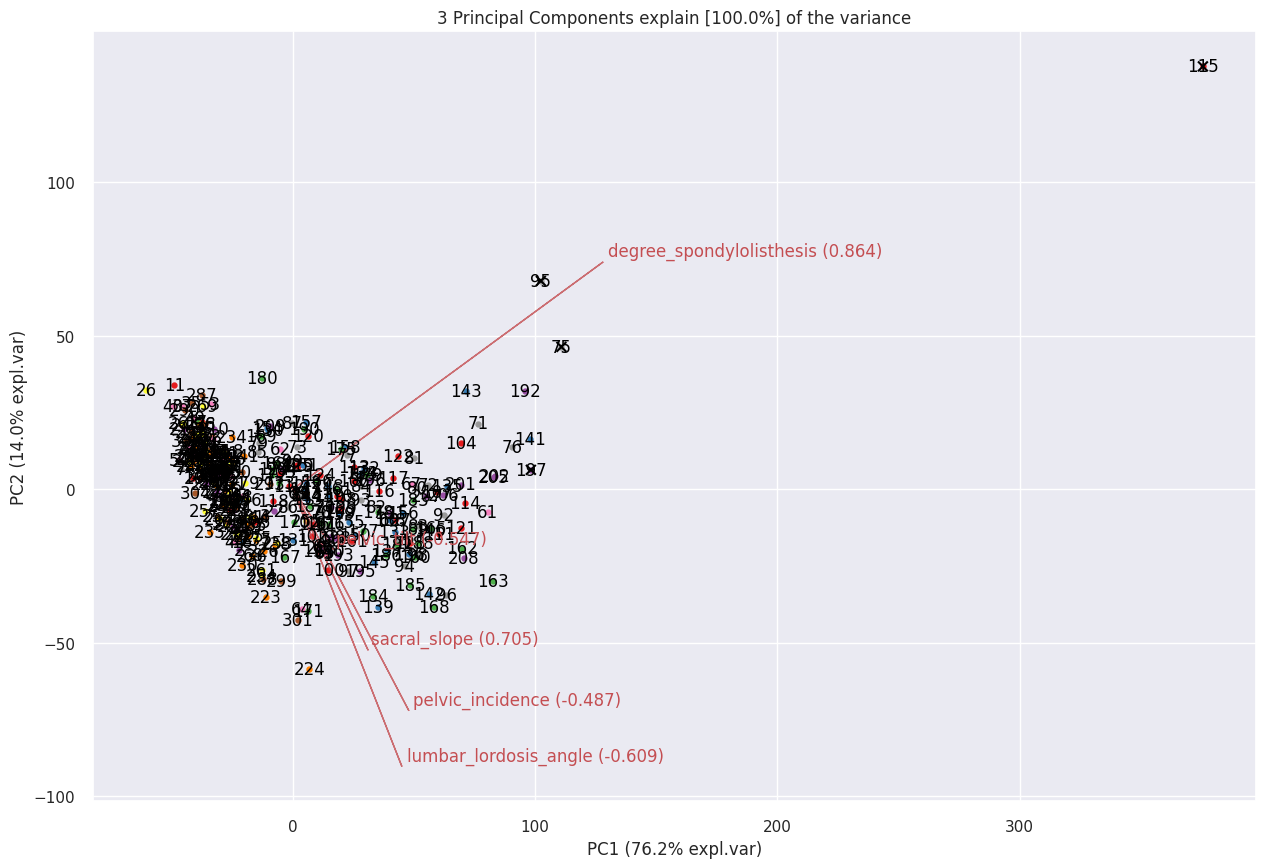

In [ ]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [310] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [310] unique colors! Available unique colors: [9].


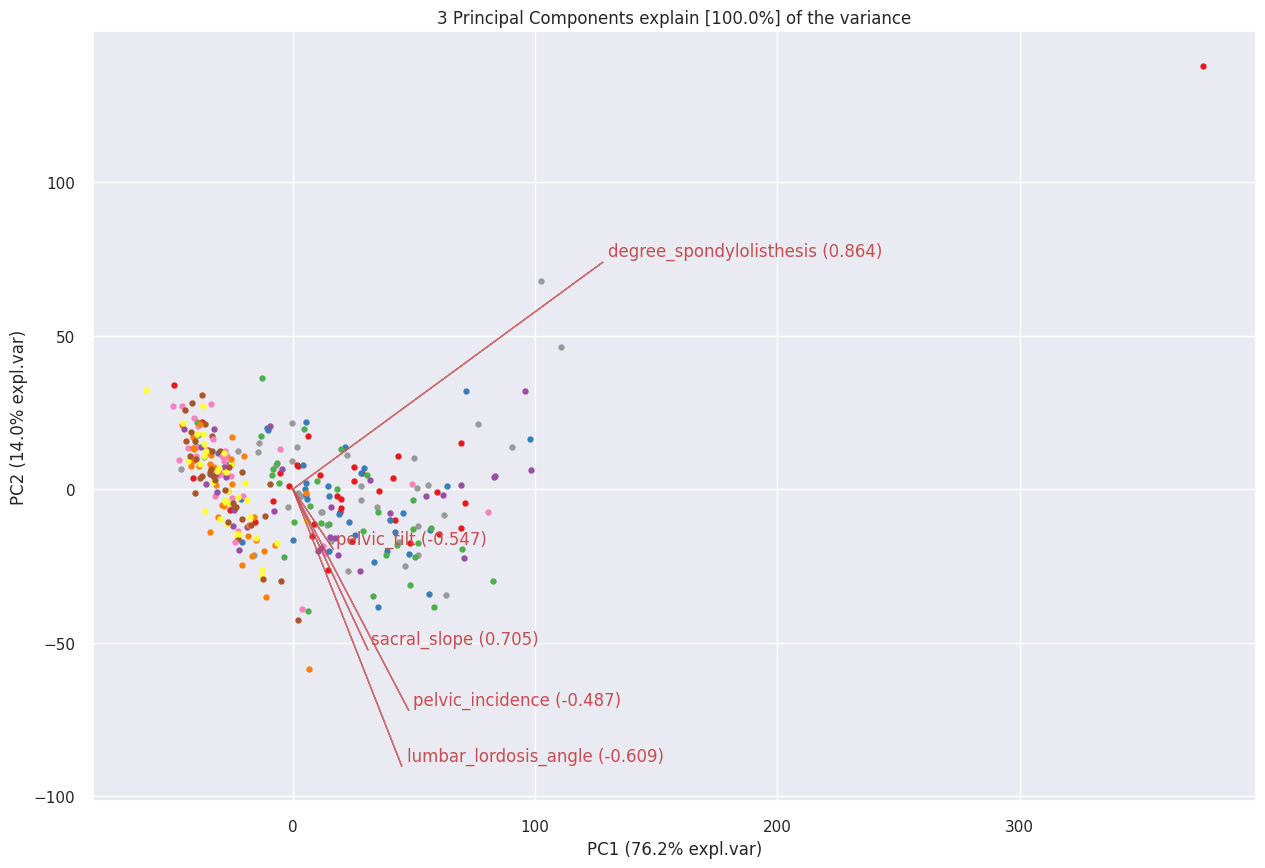

In [ ]:
ax = model.biplot(label=False, legend=False)

# **Classification**

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
data = df2
data.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (310, 6)


**Setting up the environment in Pycaret**

In [ ]:
clf = setup(data=data, target='class', train_size=0.7, session_id=666)

Description             Value
0                               session_id               666
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (310, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (216, 5)
12                    Transformed Test Set           (94, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              c64c
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing all models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8515  0.8973  0.8933  0.8964   
knn                K Neighbors Classifier    0.8340  0.8960  0.8867  0.8743   
et                 Extra Trees Classifier    0.8106  0.8847  0.8667  0.8656   
rf               Random Forest Classifier    0.8061  0.8888  0.8800  0.8479   
lightgbm  Light Gradient Boosting Machine    0.8013  0.8805  0.8600  0.8559   
dt               Decision Tree Classifier    0.7965  0.7576  0.8533  0.8539   
xgboost         Extreme Gradient Boosting    0.7926  0.8730  0.8667  0.8393   
gbc          Gradient Boosting Classifier    0.7831  0.8729  0.8600  0.8351   
svm                   SVM - Linear Kernel    0.7781  0.0000  0.8867  0.8287   
qda       Quadratic Discriminant Analysis    0.7593  0.8789  0.7533  0.8988   
nb                            Naive Bayes    0.7591  0.8592  0.7200  0.9231   
lda          Linear Discriminant Analysis    0.7400  0.8275  0.9467  0.7494   
ada                  Ada Boost Classifier    0.7323  0.8192  0.8067  0.8058   
ridge                    Ridge Classifier    0.7264  0.0000  0.9600  0.7330   
dummy                    Dummy Classifier    0.6948  0.5000  1.0000  0.6948   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8923  0.6512  0.6597     0.280  
knn       0.8783  0.6136  0.6224     0.013  
et        0.8605  0.5553  0.5731     0.247  
rf        0.8617  0.5325  0.5451     0.168  
lightgbm  0.8519  0.5337  0.5538     0.155  
dt        0.8510  0.5212  0.5282     0.010  
xgboost   0.8488  0.5094  0.5262     0.046  
gbc       0.8444  0.4801  0.4941     0.110  
svm       0.8470  0.4326  0.4844     0.010  
qda       0.8112  0.4692  0.5092     0.015  
nb        0.8033  0.4964  0.5296     0.010  
lda       0.8356  0.2383  0.2655     0.015  
ada       0.8043  0.3727  0.3770     0.115  
ridge     0.8304  0.1720  0.2019     0.010  
dummy     0.8198  0.0000  0.0000     0.010

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Classifiers**

From the above provided results, following candidate models are selected:

*   Logistic Regression
*   K Neighbors Classifier
*   Extra Trees Classifier
*  Random Forest Classifier


### Logistic Regression

In [ ]:
#creating Logistic Regression model
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8636  0.9429  0.9333  0.8750  0.9032  0.6733  0.6773
1       0.8636  0.8762  0.8000  1.0000  0.8889  0.7179  0.7483
2       0.8636  0.9333  0.8667  0.9286  0.8966  0.6972  0.7008
3       0.9091  0.9905  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.8182  0.7905  0.9333  0.8235  0.8750  0.5464  0.5610
5       0.8636  0.8952  0.9333  0.8750  0.9032  0.6733  0.6773
6       0.9048  0.9222  0.9333  0.9333  0.9333  0.7667  0.7667
7       0.7143  0.8222  0.7333  0.8462  0.7857  0.3636  0.3721
8       0.8095  0.8778  0.8667  0.8667  0.8667  0.5333  0.5333
9       0.9048  0.9222  0.9333  0.9333  0.9333  0.7667  0.7667
Mean    0.8515  0.8973  0.8933  0.8964  0.8923  0.6512  0.6597
SD      0.0559  0.0558  0.0742  0.0493  0.0424  0.1252  0.1263

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Tune Logistic Regression Model
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8636  0.9429  0.9333  0.8750  0.9032  0.6733  0.6773
1       0.8636  0.8762  0.8000  1.0000  0.8889  0.7179  0.7483
2       0.8636  0.9333  0.8667  0.9286  0.8966  0.6972  0.7008
3       0.9091  0.9905  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.8182  0.7905  0.9333  0.8235  0.8750  0.5464  0.5610
5       0.8636  0.8952  0.9333  0.8750  0.9032  0.6733  0.6773
6       0.9048  0.9222  0.9333  0.9333  0.9333  0.7667  0.7667
7       0.7143  0.8222  0.7333  0.8462  0.7857  0.3636  0.3721
8       0.8095  0.8778  0.8667  0.8667  0.8667  0.5333  0.5333
9       0.9048  0.9222  0.9333  0.9333  0.9333  0.7667  0.7667
Mean    0.8515  0.8973  0.8933  0.8964  0.8923  0.6512  0.6597
SD      0.0559  0.0558  0.0742  0.0493  0.0424  0.1252  0.1263

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=3.799, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# Evaluate Decision Tree Model
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=3.799, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### K Neighbors Classifier

In [ ]:
# Create K Neighbors Model
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8636  0.9286  0.9333  0.8750  0.9032  0.6733  0.6773
1       0.8182  0.8952  0.8000  0.9231  0.8571  0.6106  0.6225
2       0.8636  0.9238  0.9333  0.8750  0.9032  0.6733  0.6773
3       0.9091  0.9762  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.6364  0.7524  0.6667  0.7692  0.7143  0.2212  0.2256
5       0.7727  0.8667  0.8667  0.8125  0.8387  0.4554  0.4582
6       0.9048  0.9333  1.0000  0.8824  0.9375  0.7407  0.7670
7       0.7619  0.8833  0.8000  0.8571  0.8276  0.4444  0.4472
8       0.8571  0.9111  0.8667  0.9286  0.8966  0.6667  0.6708
9       0.9524  0.8889  1.0000  0.9375  0.9677  0.8772  0.8839
Mean    0.8340  0.8960  0.8867  0.8743  0.8783  0.6136  0.6224
SD      0.0867  0.0562  0.1035  0.0496  0.0693  0.1813  0.1850

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Tune K Neighbors model
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8636  0.9238  0.8667  0.9286  0.8966  0.6972  0.7008
1       0.9091  0.8952  0.8667  1.0000  0.9286  0.8053  0.8210
2       0.8182  0.9381  0.8000  0.9231  0.8571  0.6106  0.6225
3       0.9091  0.9952  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.6818  0.8048  0.6667  0.8333  0.7407  0.3419  0.3563
5       0.8636  0.9238  0.9333  0.8750  0.9032  0.6733  0.6773
6       0.9524  0.9667  1.0000  0.9375  0.9677  0.8772  0.8839
7       0.7143  0.8389  0.7333  0.8462  0.7857  0.3636  0.3721
8       0.8571  0.9056  0.8667  0.9286  0.8966  0.6667  0.6708
9       0.9524  0.8667  1.0000  0.9375  0.9677  0.8772  0.8839
Mean    0.8522  0.9059  0.8733  0.9092  0.8881  0.6686  0.6783
SD      0.0872  0.0545  0.1093  0.0473  0.0709  0.1791  0.1787

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#Evaluate K Neighbors Model
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Random Forest Classifier

In [ ]:
#Create Random Forest model
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7273  0.8762  0.8667  0.7647  0.8125  0.3196  0.3281
1       0.8636  0.9048  0.8667  0.9286  0.8966  0.6972  0.7008
2       0.8636  0.9524  0.8667  0.9286  0.8966  0.6972  0.7008
3       0.9091  1.0000  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.6818  0.7190  0.7333  0.7857  0.7586  0.2936  0.2951
5       0.6818  0.8857  0.8000  0.7500  0.7742  0.2376  0.2390
6       0.8571  0.9389  1.0000  0.8333  0.9091  0.5882  0.6455
7       0.7619  0.8111  0.8000  0.8571  0.8276  0.4444  0.4472
8       0.8095  0.9000  0.8667  0.8667  0.8667  0.5333  0.5333
9       0.9048  0.9000  1.0000  0.8824  0.9375  0.7407  0.7670
Mean    0.8061  0.8888  0.8800  0.8479  0.8617  0.5325  0.5451
SD      0.0828  0.0738  0.0884  0.0603  0.0617  0.1886  0.1956

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=666, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#Tune Random Forest Model
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8636  0.8857  0.8667  0.9286  0.8966  0.6972  0.7008
1       0.7727  0.8762  0.6667  1.0000  0.8000  0.5600  0.6236
2       0.8636  0.9524  0.8000  1.0000  0.8889  0.7179  0.7483
3       0.9545  1.0000  1.0000  0.9375  0.9677  0.8911  0.8964
4       0.5909  0.7524  0.5333  0.8000  0.6400  0.2080  0.2316
5       0.8182  0.8762  0.8000  0.9231  0.8571  0.6106  0.6225
6       0.8571  0.9778  0.9333  0.8750  0.9032  0.6316  0.6364
7       0.8571  0.8667  0.8000  1.0000  0.8889  0.6957  0.7303
8       0.8571  0.8778  0.8667  0.9286  0.8966  0.6667  0.6708
9       0.9524  0.8778  1.0000  0.9375  0.9677  0.8772  0.8839
Mean    0.8387  0.8943  0.8267  0.9330  0.8707  0.6556  0.6745
SD      0.0974  0.0661  0.1373  0.0589  0.0896  0.1800  0.1747

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=666, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#Evaluate Random Forest Model
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=666, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Extra Trees Classifier

In [ ]:
#Create Extra Trees Classifier
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7273  0.9048  0.9333  0.7368  0.8235  0.2584  0.2973
1       0.8636  0.9238  0.8000  1.0000  0.8889  0.7179  0.7483
2       0.8636  0.9333  0.8667  0.9286  0.8966  0.6972  0.7008
3       0.9091  0.9762  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.6364  0.6667  0.6000  0.8182  0.6923  0.2727  0.2928
5       0.7727  0.9143  0.8667  0.8125  0.8387  0.4554  0.4582
6       0.9048  0.9667  1.0000  0.8824  0.9375  0.7407  0.7670
7       0.7143  0.8000  0.7333  0.8462  0.7857  0.3636  0.3721
8       0.8095  0.8833  0.8667  0.8667  0.8667  0.5333  0.5333
9       0.9048  0.8778  1.0000  0.8824  0.9375  0.7407  0.7670
Mean    0.8106  0.8847  0.8667  0.8656  0.8605  0.5553  0.5731
SD      0.0900  0.0866  0.1229  0.0670  0.0746  0.1944  0.1951

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=666, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#Tune Extra Trees classifier model
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8636  0.8952  0.8000  1.0000  0.8889  0.7179  0.7483
1       0.7273  0.9714  0.6000  1.0000  0.7500  0.4884  0.5684
2       0.8636  0.9524  0.8000  1.0000  0.8889  0.7179  0.7483
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.6364  0.8000  0.5333  0.8889  0.6667  0.3178  0.3699
5       0.8182  0.9048  0.7333  1.0000  0.8462  0.6364  0.6831
6       0.7619  0.9444  0.6667  1.0000  0.8000  0.5333  0.6030
7       0.7143  0.8333  0.6667  0.9091  0.7692  0.4167  0.4523
8       0.8095  0.9111  0.8000  0.9231  0.8571  0.5758  0.5892
9       0.9524  0.8889  1.0000  0.9375  0.9677  0.8772  0.8839
Mean    0.8147  0.9102  0.7600  0.9659  0.8435  0.6281  0.6646
SD      0.1051  0.0579  0.1467  0.0433  0.0957  0.1972  0.1804

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=10, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=666, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# Evaluate Extra Trees Classifier model
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=10, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=666, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [ ]:
clf = setup(data=data, target='class', train_size=0.7, session_id=666, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               666
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (310, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (216, 3)
12                    Transformed Test Set           (94, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f3b4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7911  0.8700  0.8933  0.8270   
rf               Random Forest Classifier    0.7872  0.8494  0.8800  0.8273   
xgboost         Extreme Gradient Boosting    0.7866  0.8440  0.8533  0.8443   
svm                   SVM - Linear Kernel    0.7781  0.0000  0.8600  0.8404   
knn                K Neighbors Classifier    0.7779  0.8344  0.8600  0.8268   
lightgbm  Light Gradient Boosting Machine    0.7777  0.8448  0.8600  0.8290   
et                 Extra Trees Classifier    0.7734  0.8541  0.8467  0.8302   
ada                  Ada Boost Classifier    0.7680  0.8154  0.8400  0.8294   
gbc          Gradient Boosting Classifier    0.7680  0.8544  0.8667  0.8153   
lda          Linear Discriminant Analysis    0.7543  0.8103  0.9400  0.7642   
qda       Quadratic Discriminant Analysis    0.7452  0.8498  0.7333  0.8872   
nb                            Naive Bayes    0.7450  0.8195  0.7467  0.8735   
dt               Decision Tree Classifier    0.7405  0.6910  0.8200  0.8110   
ridge                    Ridge Classifier    0.7175  0.0000  0.9467  0.7297   
dummy                    Dummy Classifier    0.6948  0.5000  1.0000  0.6948   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8567  0.4603  0.4631     0.014  
rf        0.8515  0.4746  0.4815     0.280  
xgboost   0.8467  0.4923  0.4994     0.038  
svm       0.8398  0.4548  0.4948     0.019  
knn       0.8420  0.4641  0.4707     0.017  
lightgbm  0.8432  0.4605  0.4637     0.021  
et        0.8369  0.4607  0.4656     0.144  
ada       0.8330  0.4466  0.4524     0.077  
gbc       0.8382  0.4256  0.4330     0.067  
lda       0.8413  0.3085  0.3507     0.010  
qda       0.7981  0.4548  0.4789     0.015  
nb        0.8014  0.4436  0.4600     0.016  
dt        0.8118  0.3884  0.4004     0.015  
ridge     0.8224  0.1709  0.2352     0.015  
dummy     0.8198  0.0000  0.0000     0.009

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic Regression on PCA model

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6818  0.8667  0.8667  0.7222  0.7879  0.1720  0.1840
1       0.7727  0.8857  0.8667  0.8125  0.8387  0.4554  0.4582
2       0.8636  0.9524  0.9333  0.8750  0.9032  0.6733  0.6773
3       0.9091  0.9333  1.0000  0.8824  0.9375  0.7732  0.7939
4       0.7273  0.7048  0.8000  0.8000  0.8000  0.3714  0.3714
5       0.7727  0.9238  0.8667  0.8125  0.8387  0.4554  0.4582
6       0.7143  0.8556  0.8000  0.8000  0.8000  0.3000  0.3000
7       0.7619  0.7222  0.8667  0.8125  0.8387  0.3860  0.3889
8       0.7143  0.8444  1.0000  0.7143  0.8333  0.0000  0.0000
9       0.9048  0.9111  0.9333  0.9333  0.9333  0.7667  0.7667
Mean    0.7823  0.8600  0.8933  0.8165  0.8511  0.4353  0.4399
SD      0.0779  0.0804  0.0680  0.0643  0.0519  0.2377  0.2398

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=0.558, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

LogisticRegression(C=0.558, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.558, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Random Forest Classifier on PCA model

In [ ]:
rfP = create_model('rf')
tunedRFp = tune_model(rfP)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7727  0.8381  0.8000  0.8571  0.8276  0.4954  0.4980
1       0.8182  0.9238  0.8000  0.9231  0.8571  0.6106  0.6225
2       0.7273  0.8571  0.8000  0.8000  0.8000  0.3714  0.3714
3       0.7727  0.8762  0.8000  0.8571  0.8276  0.4954  0.4980
4       0.7273  0.7333  0.8000  0.8000  0.8000  0.3714  0.3714
5       0.8182  0.9238  0.8000  0.9231  0.8571  0.6106  0.6225
6       0.8571  0.9444  0.8667  0.9286  0.8966  0.6667  0.6708
7       0.5238  0.6556  0.5333  0.7273  0.6154  0.0278  0.0302
8       0.8095  0.8000  0.8667  0.8667  0.8667  0.5333  0.5333
9       0.8571  0.9000  0.9333  0.8750  0.9032  0.6316  0.6364
Mean    0.7684  0.8452  0.8000  0.8558  0.8251  0.4814  0.4855
SD      0.0925  0.0877  0.0989  0.0613  0.0776  0.1798  0.1818

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=666, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
evaluate_model(tunedRFp)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=666, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Extreme Gradient Boosting classifier on PCA model

In [ ]:
xgboostP = create_model('xgboost')
tuned_xgboostP = tune_model(xgboostP)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6818  0.8190  0.9333  0.7000  0.8000  0.0941  0.1234
1       0.6818  0.9429  0.9333  0.7000  0.8000  0.0941  0.1234
2       0.6818  0.7810  0.9333  0.7000  0.8000  0.0941  0.1234
3       0.7273  0.8000  1.0000  0.7143  0.8333  0.1852  0.3194
4       0.8182  0.8286  1.0000  0.7895  0.8824  0.5056  0.5817
5       0.7727  0.9143  0.8667  0.8125  0.8387  0.4554  0.4582
6       0.8095  0.9111  1.0000  0.7895  0.8824  0.4167  0.5130
7       0.7619  0.6778  0.9333  0.7778  0.8485  0.3137  0.3443
8       0.8095  0.8222  1.0000  0.7895  0.8824  0.4167  0.5130
9       0.8095  0.9000  1.0000  0.7895  0.8824  0.4167  0.5130
Mean    0.7554  0.8397  0.9600  0.7562  0.8450  0.2992  0.3613
SD      0.0549  0.0755  0.0442  0.0439  0.0344  0.1574  0.1728

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 15
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=290, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
evaluate_model(tuned_xgboostP)
#evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=290, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### KNN classifier on PCA model

In [ ]:
knn = create_model('knn')
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7273  0.8667  0.8667  0.7647  0.8125  0.3196  0.3281
1       0.9091  0.9048  0.8667  1.0000  0.9286  0.8053  0.8210
2       0.7273  0.8476  0.8000  0.8000  0.8000  0.3714  0.3714
3       0.8636  0.8762  0.9333  0.8750  0.9032  0.6733  0.6773
4       0.7727  0.7810  0.8667  0.8125  0.8387  0.4554  0.4582
5       0.8182  0.8571  0.8667  0.8667  0.8667  0.5810  0.5810
6       0.8095  0.9222  1.0000  0.7895  0.8824  0.4167  0.5130
7       0.7143  0.7000  0.8667  0.7647  0.8125  0.2222  0.2301
8       0.8095  0.8000  0.9333  0.8235  0.8750  0.4815  0.4985
9       0.8571  0.9111  1.0000  0.8333  0.9091  0.5882  0.6455
Mean    0.8009  0.8467  0.9000  0.8330  0.8629  0.4915  0.5124
SD      0.0620  0.0653  0.0615  0.0660  0.0427  0.1650  0.1678

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 17
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Explainable AI with Shapely Values**

### SHAP summary plot

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=666, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


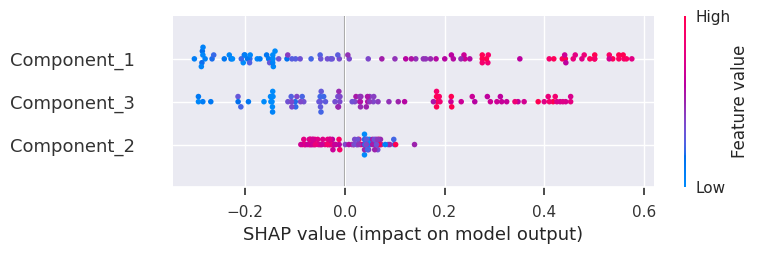

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tunedRFp, plot='summary')

### Visualizing Predictions

In [ ]:
interpret_model(tunedRFp, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=666, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
